## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
import seaborn as sns # 另一個繪圖-樣式套件

import warnings
warnings.filterwarnings('ignore')

In [4]:
# 取得「年齡」區間

app_train['AGE'] = (app_train['DAYS_BIRTH'] / 365).astype('int')
app_train['AGE_BINNED'] = pd.cut(app_train['AGE'], 10)

app_train['AGE_BINNED'].value_counts().sort_index()

(19.951, 24.9]    12150
(24.9, 29.8]      32850
(29.8, 34.7]      39439
(34.7, 39.6]      42860
(39.6, 44.5]      41416
(44.5, 49.4]      35127
(49.4, 54.3]      34942
(54.3, 59.2]      33132
(59.2, 64.1]      27473
(64.1, 69.0]       8122
Name: AGE_BINNED, dtype: int64

In [5]:
# 查看「年齡」區間的「平均收入」

(app_train.groupby('AGE_BINNED')['AMT_INCOME_TOTAL'].mean()).astype('int')

AGE_BINNED
(19.951, 24.9]    145340
(24.9, 29.8]      164695
(29.8, 34.7]      178150
(34.7, 39.6]      179607
(39.6, 44.5]      181419
(44.5, 49.4]      179589
(49.4, 54.3]      171301
(54.3, 59.2]      158607
(59.2, 64.1]      144798
(64.1, 69.0]      118969
Name: AMT_INCOME_TOTAL, dtype: int32

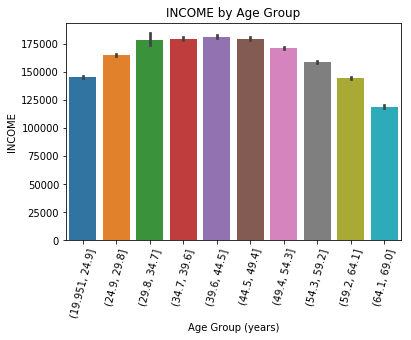

In [6]:
# 圖示

px = 'AGE_BINNED'
py = 'AMT_INCOME_TOTAL'
sns.barplot(px, py, data=app_train)

# Plot labeling
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('INCOME')
plt.title('INCOME by Age Group');